In [6]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#import keras
#from keras.models import sequential
#from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

In [3]:
df1=pd.read_csv('Famelli.csv')
df2=pd.read_csv('Foolad.csv')
df3=df1.iloc[::-1]
df4=df2.iloc[::-1]
a=range(1,3009)
b=range(1,2974)
df3.head()
df3

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
3007,S*I..N..C..Ind.,20070204,4000.0,4000.0,3600.0,3704.0,640374172370,172898994,2489,D,4000.0,3704.0
3006,S*I..N..C..Ind.,20070205,3778.0,3778.0,3778.0,3778.0,40902501888,10826496,1709,D,3704.0,3778.0
3005,S*I..N..C..Ind.,20070206,3853.0,3853.0,3853.0,3853.0,103453562449,26850133,4118,D,3778.0,3853.0
3004,S*I..N..C..Ind.,20070207,3930.0,3930.0,3930.0,3930.0,122171316570,31086849,4247,D,3853.0,3930.0
3003,S*I..N..C..Ind.,20070210,4008.0,4008.0,4008.0,4008.0,162907276224,40645528,4984,D,3930.0,4008.0
3002,S*I..N..C..Ind.,20070212,4088.0,4088.0,4012.0,4012.0,881016384,215513,93,D,4008.0,4012.0
3001,S*I..N..C..Ind.,20070213,4092.0,4092.0,4092.0,4092.0,20912264208,5110524,1123,D,4012.0,4092.0
3000,S*I..N..C..Ind.,20070214,4173.0,4173.0,4173.0,4173.0,21297439644,5103628,1152,D,4092.0,4173.0
2999,S*I..N..C..Ind.,20070217,4256.0,4256.0,4141.0,4235.0,149512486901,35308907,7352,D,4173.0,4235.0
2998,S*I..N..C..Ind.,20070218,4240.0,4257.0,4151.0,4227.0,62631121478,14815582,2667,D,4235.0,4227.0


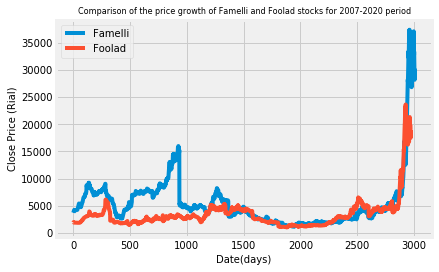

In [4]:
from matplotlib import pyplot as plt
y1=df3['<CLOSE>']
y2=df4['<CLOSE>']
plt.plot(a,y1)
plt.plot(b,y2)
plt.xlabel("Date(days)", fontsize=10)
plt.ylabel("Close Price (Rial)", fontsize=10)
plt.title("Comparison of the price growth of Famelli and Foolad stocks for 2007-2020 period", fontsize=8)
plt.legend(['Famelli','Foolad'])
plt.savefig('Famelli.pdf', bbox_inches='tight')
plt.show()

In [5]:
## Create a new datdframe with only the Close column
data=df3.filter(['<CLOSE>'])
#Convert the data to the numpy arrays
dataset=data.values
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
print(training_data_len)

2407


In [9]:
# Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
print(scaled_data)


[[0.07071765]
 [0.07275785]
 [0.07482562]
 ...
 [0.76069036]
 [0.79653166]
 [0.7769568 ]]
